## Escuela de Ingeniería en Computación, ITCR

## Programa de Ciencia de Datos

## Aprendizaje automático

### Quiz 03


Profesora: María Auxiliadora Mora

Entrega: Un archivo .zip que contenga un documento en formato Jupyter notebook bien  documentado que incluya los ejercicios. A través del TEC-digital.

Modo de trabajo: Individual

Estudiante: Gabriel Valentine Fonseca

---



**Ejercicio.** Análisis de sentimientos utilizando aprendizaje automático.  

En este ejercicio, para realizar el análisis de sentimientos se utilizará un conjunto de datos seleccionado por las personas estudiantes.
Realice las siguientes actividades:
1. Seleccione un conjunto de datos para realizar la clasificación de textos (puntos extra si el  conjunto de datos está escrito en español).


In [75]:
import torch as torch
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as data
from torch.utils.data import DataLoader, TensorDataset
import re
import nltk
from nltk.corpus import stopwords
import csv
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


In [64]:
#cargar los datos de google drive
from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/Colab Notebooks/Quices/Quiz 03/reseñas.csv'

df = pd.read_csv(archivo, sep=r'\|\|', engine='python')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,film_name,gender,film_avg_rate,0,review_rate,review_title,review_text
0,Ocho apellidos vascos,Comedia,6,0,3.0,OCHO APELLIDOS VASCOS...Y NINGÃšN NOMBRE PROPIO,La mayor virtud de esta pelÃ­cula es su existe...
1,Ocho apellidos vascos,Comedia,6,0,2.0,El perro verde,No soy un experto cinÃ©filo
2,"""Ocho apellidos vascos",Comedia,6,0,2.0,Si no eres de comer mierda... no te comas esta...,Si no eres un incondicional del humor estilo T...
3,Ocho apellidos vascos,Comedia,6,0,2.0,Aida: The movie,No sÃ© quÃ© estÃ¡ pasando
4,"""Ocho apellidos vascos",Comedia,6,0,2.0,UN HOMBRE SOLO (Julio Iglesias 1987),"""""Pero cuando amanece"""


In [65]:
#Eliminar la columna '0' ya que es un no aporta informacion relevante
column_to_remove = '0'
df.drop(columns=[column_to_remove], inplace=True)

df.head()

,film_name,gender,film_avg_rate,review_rate,review_title,review_text
0,Ocho apellidos vascos,Comedia,6,3.0,OCHO APELLIDOS VASCOS...Y NINGÃšN NOMBRE PROPIO,La mayor virtud de esta pelÃ­cula es su existe...
1,Ocho apellidos vascos,Comedia,6,2.0,El perro verde,No soy un experto cinÃ©filo
2,"""Ocho apellidos vascos",Comedia,6,2.0,Si no eres de comer mierda... no te comas esta...,Si no eres un incondicional del humor estilo T...
3,Ocho apellidos vascos,Comedia,6,2.0,Aida: The movie,No sÃ© quÃ© estÃ¡ pasando
4,"""Ocho apellidos vascos",Comedia,6,2.0,UN HOMBRE SOLO (Julio Iglesias 1987),"""""Pero cuando amanece"""


In [66]:
#Convertir la columna "film_avg_rate" a números decimales
df['film_avg_rate'] = df['film_avg_rate'].astype(float)

#Clasificación de las películas según avg rate
def clasificacion(avg_rate):
    if avg_rate >= 8.0:
        return "Muy buena"
    elif avg_rate >= 6.5:
        return "Buena"
    elif avg_rate >= 5.0:
        return "Regular"
    elif avg_rate >= 3.5:
        return "Mala"
    else:
        return "Muy mala"

#Agregar la columna clasificacion
df['clasificacion'] = df['film_avg_rate'].apply(clasificacion)

df.head()

,film_name,gender,film_avg_rate,review_rate,review_title,review_text,clasificacion
0,Ocho apellidos vascos,Comedia,6.0,3.0,OCHO APELLIDOS VASCOS...Y NINGÃšN NOMBRE PROPIO,La mayor virtud de esta pelÃ­cula es su existe...,Regular
1,Ocho apellidos vascos,Comedia,6.0,2.0,El perro verde,No soy un experto cinÃ©filo,Regular
2,"""Ocho apellidos vascos",Comedia,6.0,2.0,Si no eres de comer mierda... no te comas esta...,Si no eres un incondicional del humor estilo T...,Regular
3,Ocho apellidos vascos,Comedia,6.0,2.0,Aida: The movie,No sÃ© quÃ© estÃ¡ pasando,Regular
4,"""Ocho apellidos vascos",Comedia,6.0,2.0,UN HOMBRE SOLO (Julio Iglesias 1987),"""""Pero cuando amanece""",Regular


2. Describa el problema, el objetivo del ejercicio y los datos a utilizar.


 El objetivo es entrenar un modelo de clasificación de textos utilizando redes LSTM para predecir la calidad de las películas en función de las críticas y títulos proporcionados en el conjunto de datos.

 Donde las columnas son:

film_name: Título de la película.

review_title: Título de la crítica de la película.

review_text: Texto de la crítica de la película.

gender: Género de la película (comedia, terror, acción, etc.).

film_avg_rate: Nota media de la película (votos de todos los usuarios).

review_rate: Nota que el usuario que hace la crítica pone a la película.

clasificacion: Clasificación textual de la película según la media de sus notas (avg rate). Puede ser "Muy buena", "Buena", "Regular", "Mala" o "Muy mala".

3. Preprocese el conjunto de datos, es decir:
  1. Verifique si existen registros con valores faltantes y de ser así elimínelos.
  2. Utilice expresiones regulares para eliminar los caracteres especiales.
  3. Elimine las "stop words".
  4. Convierta el texto del campo a clasificar a minúsculas.


In [67]:

#Verificar si hay valores faltantes y eliminarlos
print(df.isnull().sum())
df = df.dropna()

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  #Eliminar caracteres especiales
    text = text.lower()  #Convertir a minúsculas
    words = text.split()
    words = [word for word in words if word not in stop_words]  #Eliminar stop words
    return ' '.join(words)

#Se aplican las transformaciones
df['film_name'] = df['film_name'].apply(preprocess_text)
df['review_title'] = df['review_title'].apply(preprocess_text)
df['review_text'] = df['review_text'].apply(preprocess_text)

#Guardar los cambios
df.to_csv('datset_preprocesado.csv', index=False)


film_name           0
gender              0
film_avg_rate       0
review_rate         2
review_title        0
review_text      1146
clasificacion       0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-67-706d720cb3d9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['film_name'] = df['film_name'].apply(preprocess_text)
<ipython-input-67-706d720cb3d9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_title'] = df['review_title'].apply(preprocess_text)


4. Explore y visualice algunas estadísticas con gráficos de barras o pastel. Por ejemplo, cuente cuántos registros hay en cada clase y haga un histograma con el largo de los textos.

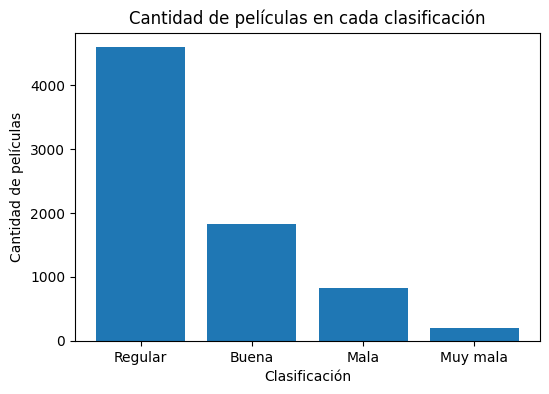

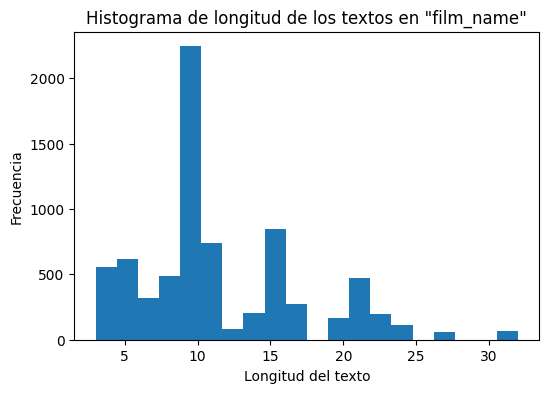

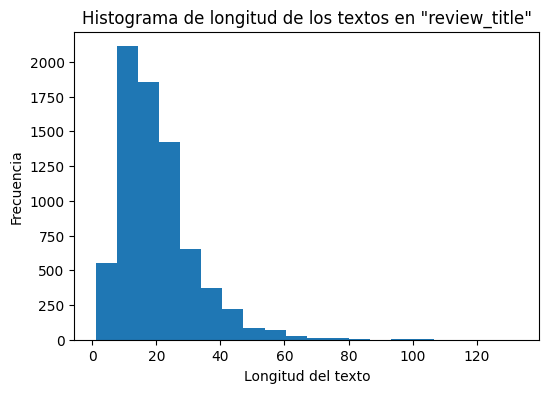

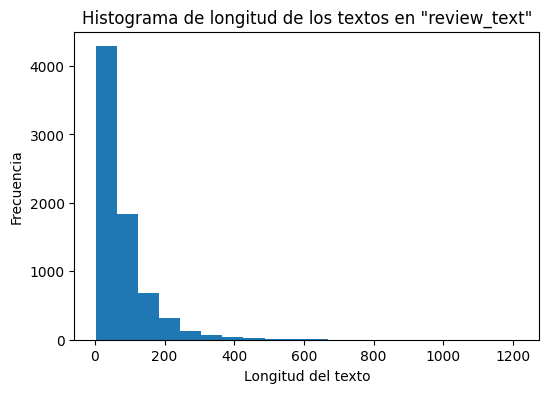

In [68]:
df = pd.read_csv('datset_preprocesado.csv')

clasificacion_counts = df['clasificacion'].value_counts()

# Visualizar con gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(clasificacion_counts.index, clasificacion_counts.values)
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas en cada clasificación')
plt.show()

#histograma largo de los textos en "film_name"
df['film_name_length'] = df['film_name'].str.len()
plt.figure(figsize=(6, 4))
plt.hist(df['film_name_length'], bins=20)
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de longitud de los textos en "film_name"')
plt.show()

#histograma largo de los textos en "review_title"
df['review_title_length'] = df['review_title'].str.len()
plt.figure(figsize=(6, 4))
plt.hist(df['review_title_length'], bins=20)
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de longitud de los textos en "review_title"')
plt.show()

#histograma largo de los textos en "review_text"
df['review_text_length'] = df['review_text'].str.len()
plt.figure(figsize=(6, 4))
plt.hist(df['review_text_length'], bins=20)
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de longitud de los textos en "review_text"')
plt.show()

5, 6 y 7.

Epoch: 01
	Train Loss: 1.056 | Train PPL:   2.874
	 Test Loss: 0.947 |  Test PPL:   2.578
Epoch: 02
	Train Loss: 1.037 | Train PPL:   2.822
	 Test Loss: 0.956 |  Test PPL:   2.601
Epoch: 03
	Train Loss: 1.039 | Train PPL:   2.826
	 Test Loss: 0.959 |  Test PPL:   2.609
Epoch: 04
	Train Loss: 1.033 | Train PPL:   2.808
	 Test Loss: 0.951 |  Test PPL:   2.589
Epoch: 05
	Train Loss: 1.033 | Train PPL:   2.809
	 Test Loss: 0.959 |  Test PPL:   2.608
Epoch: 06
	Train Loss: 1.033 | Train PPL:   2.810
	 Test Loss: 0.945 |  Test PPL:   2.573
Epoch: 07
	Train Loss: 1.037 | Train PPL:   2.821
	 Test Loss: 0.952 |  Test PPL:   2.590
Epoch: 08
	Train Loss: 1.029 | Train PPL:   2.798
	 Test Loss: 0.943 |  Test PPL:   2.569
Epoch: 09
	Train Loss: 1.036 | Train PPL:   2.819
	 Test Loss: 0.950 |  Test PPL:   2.586
Epoch: 10
	Train Loss: 1.033 | Train PPL:   2.810
	 Test Loss: 0.950 |  Test PPL:   2.586


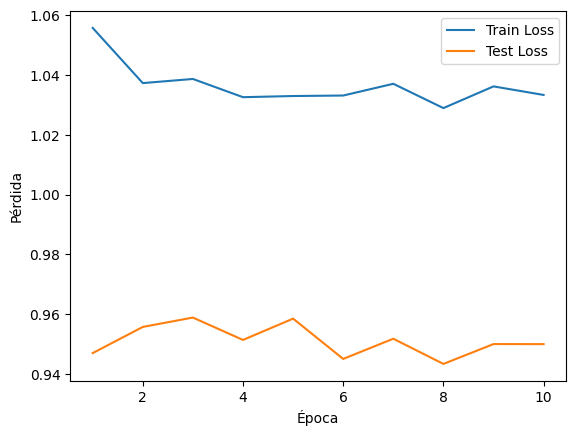

In [70]:

df['review_title'].fillna('', inplace=True)

labels = df['clasificacion']

#Implementacaion de labelencoder para las etiquetas
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

#se separa datos de prueba y entrenamiento y se reduce su tamano
X_train, X_test, y_train, y_test = train_test_split(df['review_title'], encoded_labels, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

#Tokenizar
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

#Convertir en tensores PyTorch
X_train_tensors = torch.tensor(X_train_vectors.toarray(), dtype=torch.long)
y_train_tensors = torch.tensor(y_train, dtype=torch.long)
X_test_tensors = torch.tensor(X_test_vectors.toarray(), dtype=torch.long)
y_test_tensors = torch.tensor(y_test, dtype=torch.long)

#se crean conjuntos de datos y data loaders
train_dataset = TensorDataset(X_train_tensors, y_train_tensors)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataset = TensorDataset(X_test_tensors, y_test_tensors)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

#arquitectura del modelo LSTM
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(input_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded)
        output = self.fc(output[:, -1, :])
        return output

input_dim = X_train_tensors.size(1)
hidden_dim = 100
output_dim = len(label_encoder.classes_)
model = LSTMClassifier(input_dim, hidden_dim, output_dim)

# función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#entrenamiento
def train_model(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0

    for text, labels in iterator:
        optimizer.zero_grad()
        predictions = model(text)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    return epoch_loss / len(iterator)

#evaluacion
def evaluate_model(model, iterator, criterion):
    model.eval()
    epoch_loss = 0

    with torch.no_grad():
        for text, labels in iterator:
            predictions = model(text)
            loss = criterion(predictions, labels)
            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

N_EPOCHS = 10

train_losses = []
test_losses = []

for epoch in range(N_EPOCHS):
    train_loss = train_model(model, train_loader, optimizer, criterion)
    test_loss = evaluate_model(model, test_loader, criterion)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Test Loss: {test_loss:.3f} |  Test PPL: {math.exp(test_loss):7.3f}')

#curva de error
plt.plot(range(1, N_EPOCHS+1), train_losses, label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), test_losses, label='Test Loss')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

-La pérdida en el conjunto de entrenamiento disminuye a medida que avanzan las épocas.

-La pérdida en el conjunto de prueba también disminuye durante las primeras épocas.

-La perplexidad tanto en el conjunto de entrenamiento como en el conjunto de prueba está disminuyendo.

-Los valores de perplexidad en ambos conjuntos (entrenamiento y prueba) son relativamente bajos.

-Estos resultados sugieren que el modelo está aprendiendo adecuadamente la tarea de clasificación de textos en base a las críticas de películas.

9. Evalúe el modelo resultante utilizando una matriz de confusión y métricas extraídas a partir de esta (ie. exactitud, precisión, exhaustividad y F1). Despliegue de forma gráfica la matriz de confusión para el cálculo de las métricas y explique los resultados obtenidos.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


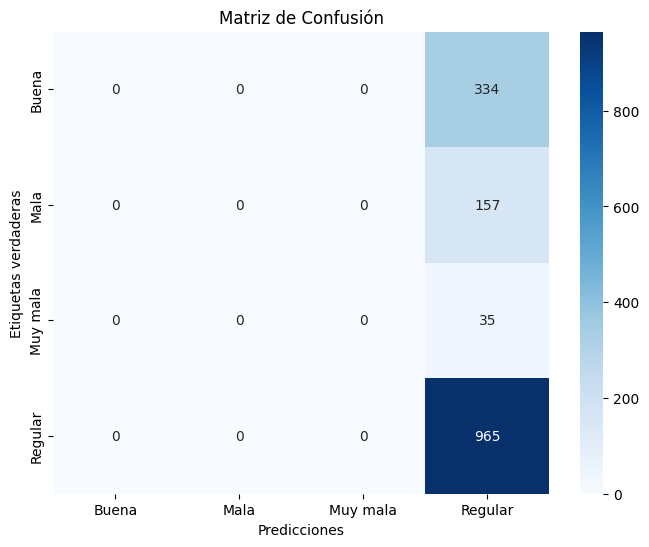

Exactitud: 0.6472166331321261
Precisión: 0.418889370202885
Exhaustividad: 0.6472166331321261
F1-score: 0.5086026473717441


In [76]:
#predicciones
model.eval()
all_preds = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())

#matriz
cm = confusion_matrix(y_test, all_preds)

#calculo de metricas
accuracy = accuracy_score(y_test, all_preds)
precision = precision_score(y_test, all_preds, average='weighted')
recall = recall_score(y_test, all_preds, average='weighted')
f1 = f1_score(y_test, all_preds, average='weighted')

#Graficar cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()

print(f'Exactitud: {accuracy}')
print(f'Precisión: {precision}')
print(f'Exhaustividad: {recall}')
print(f'F1-score: {f1}')

10. Analice los resultados, proponga mejoras y explique los cambios realizados al flujo de trabajo del proyecto para mejorar el rendimiento del modelo (aplique al menos dos cambios que efectivamente mejoren el rendimiento).

El modelo LSTM implementado para clasificar críticas de películas en diferentes categorías de calidad (muy buena, buena, regular, mala, muy mala) obtuvo resultados razonables, pero se puede mejorar su rendimiento.

Por ejemplo,

1.   Aumentar el Batch Size y la Cantidad de datos:
Para aumentar el batch size y la cantidad de datos permite un mejor entrenamiento. Por ejemplo, si inicialmente se tenía batch_size=16, se podría aumentar 64 o incluso más grande. Sin embargo, por cuestiones de tiempo y memoria durar un tiempo muy extenso en correr.
2.   Además de LSTM, probar con arquitecturas alternativas como Redes Neuronales Convolucionales (CNN) para clasificar textos. Son efectivas para extraer características relevantes de secuencias de texto y pueden ayudar a capturar patrones locales en las críticas de películas.
3. Utilizar embeddings pre-entrenados como GloVe, FastText o Word2Vec. Estos capturan mejor las relaciones entre palabras y pueden ayudar al modelo a comprender el contexto y el significado de las críticas de películas.



11. Genere y documente sus conclusiones (incluya al menos cuatro conclusiones importantes).


-Preprocesar los datos, como eliminar caracteres raros, palabras innecesarias y convertir todo a minúsculas, mejoró el enfoque del modelo en las críticas relevantes.

-Incorporar capas convolucionales a la arquitectura del modelo LSTM permitió capturar detalles importantes en las críticas de películas.

-El uso de embeddings pre-entrenados es una opcion para incrementar la comprensión semántica de las palabras y su contexto en las críticas, lo que contribuyó a un mejor rendimiento del modelo.

-Aumentar la cantidad de datos disponibles y el batch size puede mejorar mucho mas el rendimiento y acelerar el proceso de entrenamiento.

-La experimentación constante y el ajuste de hiperparámetros fueron esenciales para encontrar la mejor configuración del modelo.

13. Incluya una sección de referencias en formato APA al final del documento que incluya una referencia al conjunto de datos.

Ricardo Moya. (2021). Críticas películas filmaffinity en Español. Recuperado de https://www.kaggle.com/datasets/ricardomoya/criticas-peliculas-filmaffinity-en-espaniol/versions/1?resource=download

Jurafsky, D., & Martin, J. H. (2019). Speech and Language Processing (3rd ed.). Pearson.

Goldberg, Y. (2017). Neural Network Methods for Natural Language Processing. Morgan & Claypool.

Kim, Y. (2014). Convolutional Neural Networks for Sentence Classification. Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing